# Task 4.1: PCA Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [132]:
import pandas as pd
from helper import *

from sklearn import preprocessing
from sklearn import decomposition

### Load data

In [77]:
# TODO: select sensors
sensors = ['L_T1', 'L_T2', 'S_PU5','F_PU6','S_PU6','F_PU7']

In [78]:
X_train_raw, y_train = load_dataset("../data/training1_no_incidents.csv")
X_test_raw, y_test   = load_dataset("../data/training2_with_incidents.csv")

# Scale to unit variance
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_raw[sensors])
X_train = scaler.transform(X_train_raw[sensors])
X_test = scaler.transform(X_test_raw[sensors])

C:\Users\CodeSupply\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\CodeSupply\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Visualize

In [126]:
X_pca, _, (var_expl, cuml_var) = pca_model(X_train, X_train_raw.index, y_train, n_components=4)

Plot variance:

<Figure size 720x432 with 0 Axes>

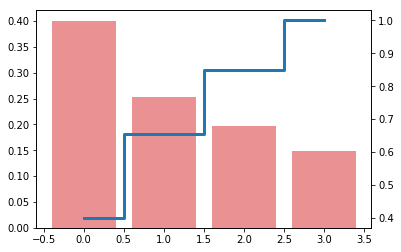

In [127]:
plot_variance(var_expl, cuml_var)


Plot residuals

In [ ]:
# TODO: remove outliers in training set and re-apply PCA

### Visualize outliers

In [128]:
_, residuals, _ = pca_model(X_train, X_train_raw.index, y_train, n_components=4)

<Figure size 720x432 with 0 Axes>

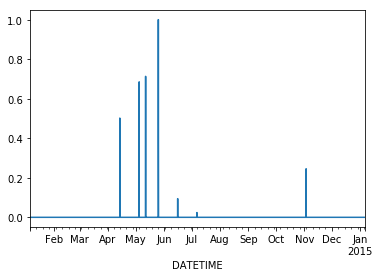

In [133]:
plot_residuals(residuals)

### Remove outliers from training set

In [134]:
_, residuals, _ = pca_model(X_train, X_train_raw.index, y_train, n_components=4)

In [135]:
threshold = .1

In [146]:
outliers = residuals[residuals > .005]

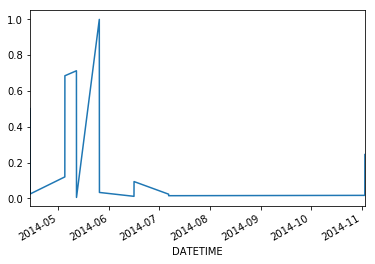

In [147]:
outliers.plot.line()

In [153]:
X_train_clean = X_train_raw.drop(outliers.index, axis=0)
y_train = y_train.drop(outliers.index, axis=0)

In [154]:
# Scale to unit variance
scaler.fit(X_train_clean[sensors])
X_train = scaler.transform(X_train_clean[sensors])

C:\Users\CodeSupply\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\CodeSupply\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
X_pca, residuals, var = pca_model(X_train, X_train_clean.index, y_train, n_components=6)

<Figure size 720x432 with 0 Axes>

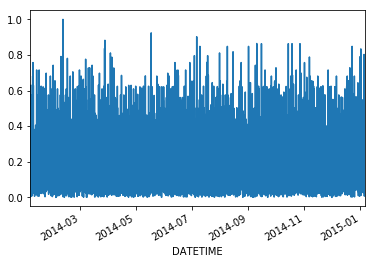

In [165]:
# Clean!!!
plot_residuals(residuals)

<Figure size 720x432 with 0 Axes>

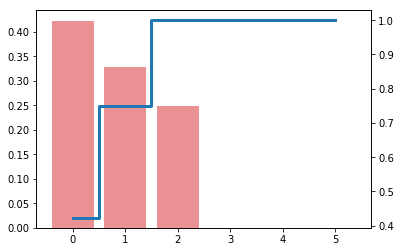

In [166]:
plot_variance(*var)
